In [1]:
import numpy as np
import cv2 # computer library library

import matplotlib.image as mpimg # for reading in images
import matplotlib.pyplot as plt

# %matplotlib qt 
%matplotlib inline

# Images as Grids of Pixels

### Read in and display the image

In [2]:
image = mpimg.imread('images/waymo_car.jpg')

print('Image type:', type(image))
print('Image dimensions:', image.shape)

Image type: <class 'numpy.ndarray'>
Image dimensions: (427, 640, 3)


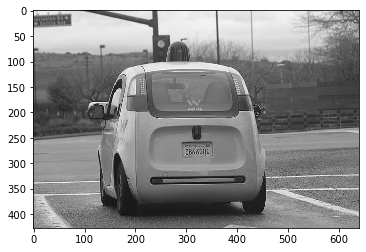

In [3]:
# change to rbg to gray image
gray_image = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)

plt.imshow(gray_image, cmap='gray')

In [4]:
# print specific gray scale pixel

y = 375
x = 190

gray_image[y, x]

28

In [5]:
print('Max:', np.max(gray_image))
print('Min:', np.min(gray_image))

Max: 255
Min: 2


In [6]:
row, col = np.unravel_index(np.argmax(gray_image), gray_image.shape)
print('Row, col:', str(row )+ ', ' + str(col))

Row, col: 108, 368


[[172  47 117 192  67]
 [251 195 103   9 211]
 [ 21 242  36  87  70]
 [216  88 140  58 193]
 [230  39  87 174  88]]


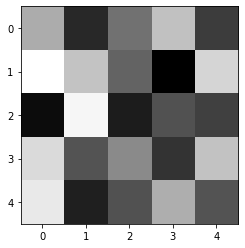

In [7]:
# Create a 5x5 image using just grayscale, numerical values

np.random.seed(0)

tiny_image = np.random.randint(256, size=(5, 5))
print(tiny_image)

plt.imshow(tiny_image, cmap='gray')
plt.show()

In [8]:
x = 3
y = 1
tiny_image[y, x]

9

# RGB colorspace¶

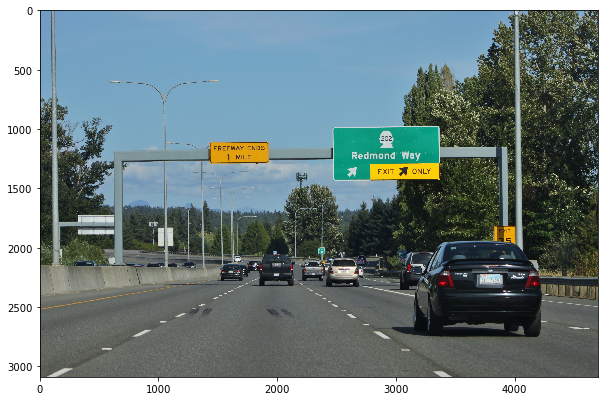

In [9]:
image = mpimg.imread('images/wa_state_highway.jpg')

plt.figure(figsize=(10,8))
plt.imshow(image)

### RGB channels

Visualize the levels of each color channel. Pay close attention to the traffic signs!

In [10]:
r = image[:, :, 0]
g = image[:, :, 1]
b = image[:, :, 2]

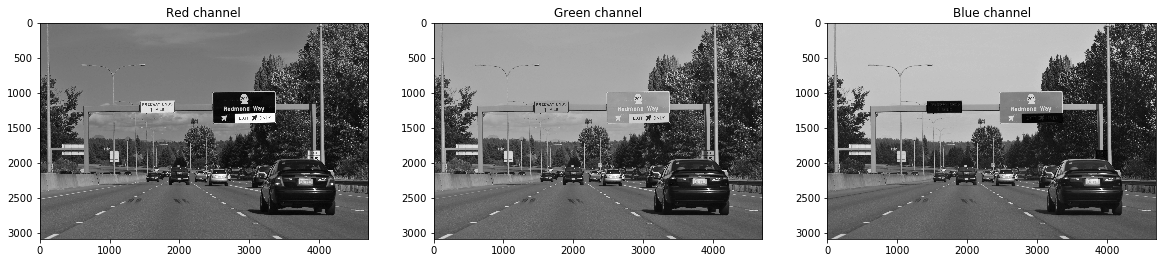

In [11]:
f, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(20,10))
ax1.set_title('Red channel')
ax1.imshow(r, cmap='gray')
ax2.set_title('Green channel')
ax2.imshow(g, cmap='gray')
ax3.set_title('Blue channel')
ax3.imshow(b, cmap='gray')



In [12]:
b[1250, 1500] # yellow cartel, very few blue color

10

In [13]:
y, x = np.unravel_index(np.argmax(g), g.shape)
print(y, x)

1969 3845


In [14]:
image[1969,3845]

array([252, 255, 226], dtype=uint8)

# Color Threshold
## Blue Screen

This image is: <class 'numpy.ndarray'>  with dimensions: (514, 816, 3)


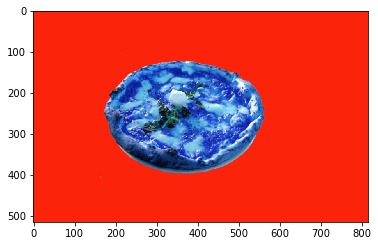

In [15]:
image = cv2.imread('images/pizza_bluescreen.jpg')

print('This image is:', type(image), 
      ' with dimensions:', image.shape)

plt.imshow(image)

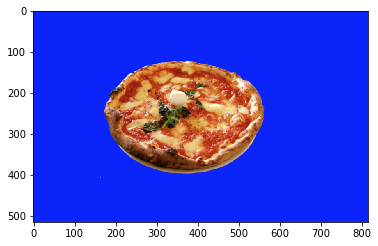

In [16]:
image_rgb = np.copy(image)

image_rgb = cv2.cvtColor(image_rgb, cv2.COLOR_BGR2RGB)

plt.imshow(image_rgb)

### Create a Mask

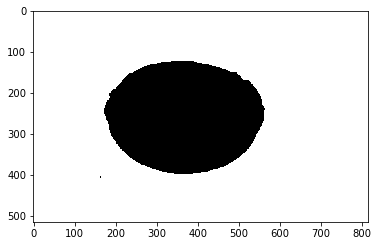

In [17]:
# brackground image

# %matplotlib qt

lower_blue = np.array([0, 0, 230]) # red, green, blue channels
upper_blue = np.array([50, 70, 255])

mask = cv2.inRange(image_rgb, lower_blue, upper_blue) # image black and white

plt.imshow(mask, cmap='gray') # white area is where the image will be allowed to show trought and the black will be blocked up

In [18]:
mask.shape

(514, 816)

In [19]:
np.unique(mask)

array([  0, 255], dtype=uint8)

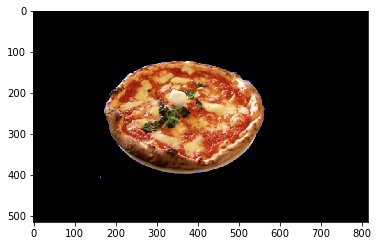

In [20]:
# only pizza image
masked_image = np.copy(image_rgb)

masked_image[mask != 0] = [0, 0, 0] # white area transform into black area

plt.imshow(masked_image)

**review numpy**

In [21]:
a = np.arange(15).reshape(3, 5)
b = np.arange(10, 25).reshape(3, 5)
c = np.array([0, 1])

print('a array:', a)
print('')
print('b array:', b)
print('')
print('c array:', c)

a array: [[ 0  1  2  3  4]
 [ 5  6  7  8  9]
 [10 11 12 13 14]]

b array: [[10 11 12 13 14]
 [15 16 17 18 19]
 [20 21 22 23 24]]

c array: [0 1]


In [22]:
b != 10

array([[False,  True,  True,  True,  True],
       [ True,  True,  True,  True,  True],
       [ True,  True,  True,  True,  True]])

In [23]:
a[b != 10]

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14])

In [24]:
a[c]

array([[0, 1, 2, 3, 4],
       [5, 6, 7, 8, 9]])

### Mask and add a background image


(1047, 1920, 3)


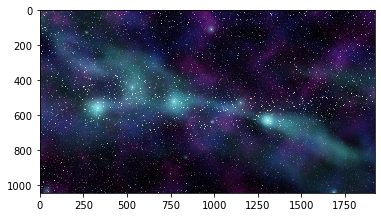

In [25]:
# Load in a background image, and convert it to RGB 
background_image = cv2.imread('images/space_background.jpg')
background_image = cv2.cvtColor(background_image, cv2.COLOR_BGR2RGB)

print(background_image.shape)
plt.imshow(background_image)

(514, 816, 3)


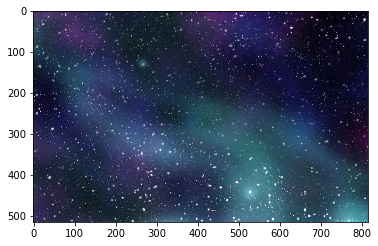

In [26]:
crop_image = background_image[:514, :816, ]
print(crop_image.shape)
plt.imshow(crop_image)

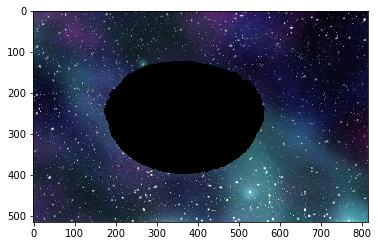

In [27]:
crop_image[mask == 0] = [0, 0, 0]
plt.imshow(crop_image)

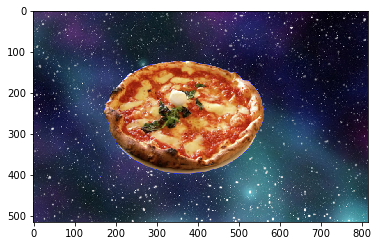

In [28]:
image_completed = crop_image + masked_image
plt.imshow(image_completed)

## Green Screen

(450, 660, 3)


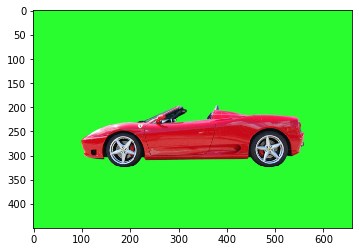

In [29]:
car = cv2.imread('images/car_green_screen.jpg')
car = cv2.cvtColor(car, cv2.COLOR_BGR2RGB)

%matplotlib inline
print(car.shape)
plt.imshow(car)

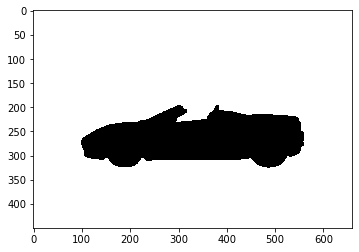

In [30]:
lower_green = np.array([0, 230, 0])
upper_green = np.array([80, 255, 80])

mask = cv2.inRange(car, lower_green, upper_green)

plt.imshow(mask, cmap='gray')

In [31]:
np.unique(mask)

array([  0, 255], dtype=uint8)

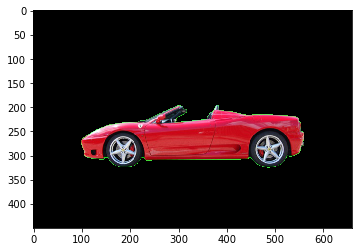

In [32]:
masked_image = np.copy(car)

masked_image[mask == 255] = [0, 0, 0]

plt.imshow(masked_image)

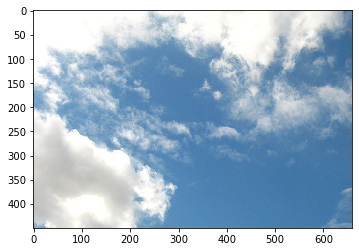

In [33]:
background_image = mpimg.imread('images/sky.jpg')
background_image = np.copy(background_image)

# crop image
crop_image = background_image[:450, :660, ]
plt.imshow(crop_image)

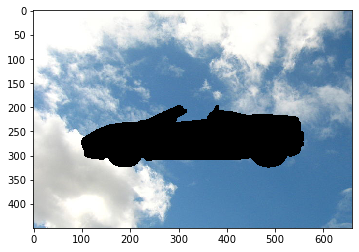

In [34]:
crop_image[mask == 0] = [0, 0, 0] 

plt.imshow(crop_image)

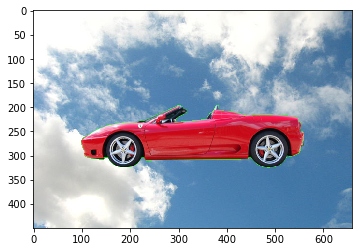

In [35]:
complete_image = masked_image + crop_image

plt.imshow(complete_image)

# HSV Color Space, Balloons

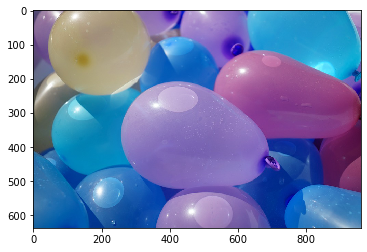

In [36]:
%matplotlib inline

# read image
image = cv2.imread('images/water_balloons.jpg')

# visualize image
plt.imshow(image)

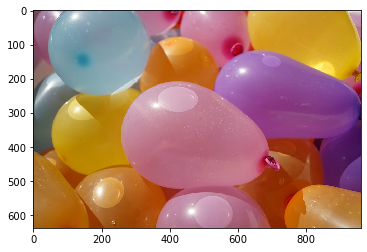

In [37]:
# color from BGR to RGB 
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

plt.imshow(image)

In [38]:
print(type(image))
print(image.shape)

<class 'numpy.ndarray'>
(638, 960, 3)


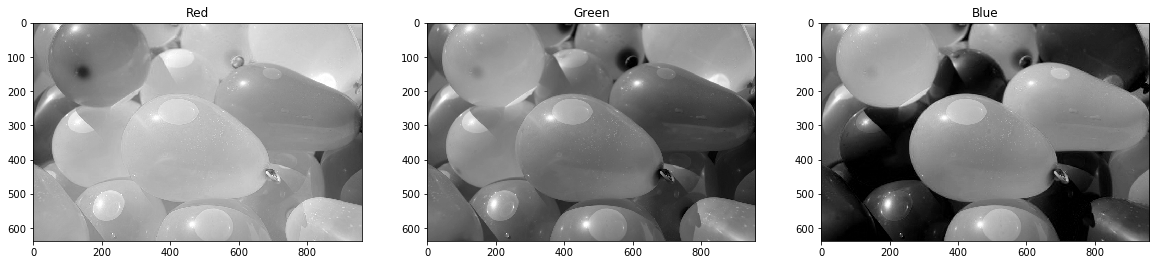

In [39]:
r = image[:, :, 0]
g = image[:, :, 1]
b = image[:, :, 2]

f, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(20, 10))

ax1.set_title('Red')
ax1.imshow(r, cmap='gray')

ax2.set_title('Green')
ax2.imshow(g, cmap='gray')

ax3.set_title('Blue')
ax3.imshow(b, cmap='gray')

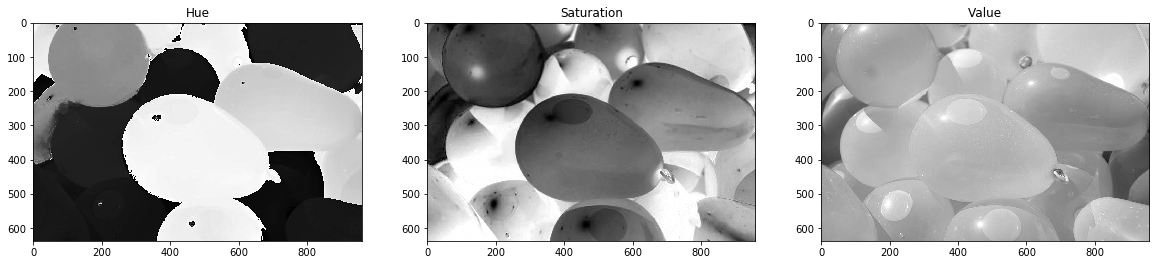

In [40]:
hsv = cv2.cvtColor(image, cv2.COLOR_RGB2HSV)

h = hsv[:, :, 0]
s = hsv[:, :, 1]
v = hsv[:, :, 2]

f, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(20,10))

ax1.set_title('Hue')
ax1.imshow(h, cmap='gray')

ax2.set_title('Saturation')
ax2.imshow(s, cmap='gray')

ax3.set_title('Value')
ax3.imshow(v, cmap='gray')

#### hue and rgb threshold

In [41]:
# Define our color selection criteria in RGB values
lower_pink = np.array([180,0,100]) 
upper_pink = np.array([255,255,230])

In [42]:
# Define our color selection criteria in HSV values (H: 0-180)
lower_hue = np.array([160,0,0]) 
upper_hue = np.array([180,255,255])

### mask rgb


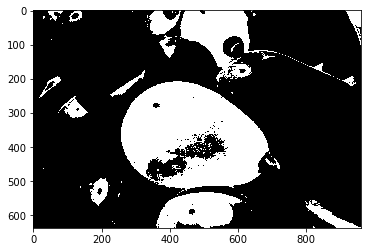

In [43]:
mask_rgb = cv2.inRange(image, lower_pink, upper_pink)

plt.imshow(mask_rgb, cmap='gray')

In [44]:
mask_rgb

array([[  0,   0,   0, ..., 255, 255, 255],
       [  0,   0,   0, ..., 255, 255, 255],
       [  0,   0,   0, ..., 255, 255, 255],
       ...,
       [  0,   0,   0, ..., 255,   0,   0],
       [  0,   0,   0, ..., 255, 255, 255],
       [  0,   0,   0, ..., 255, 255, 255]], dtype=uint8)

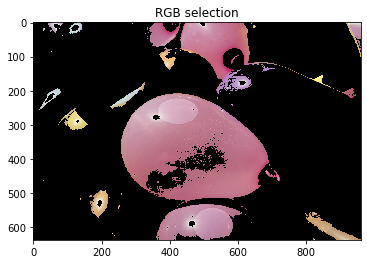

In [45]:
# mask the image
masked_image = np.copy(image)

masked_image[mask_rgb==0] = [0, 0, 0]

plt.imshow(masked_image)
plt.title('RGB selection')
plt.show()

### mask hsv

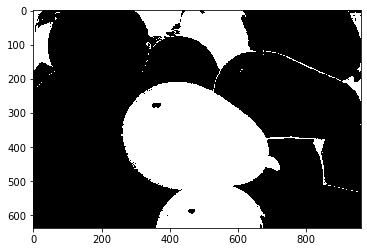

In [46]:
mask_hsv = cv2.inRange(hsv, lower_hue, upper_hue)

plt.imshow(mask_hsv, cmap='gray')

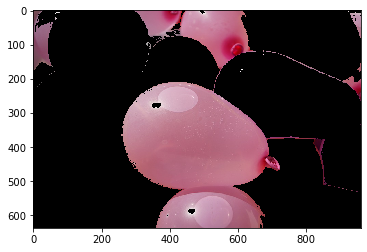

In [47]:
# masked image
masked_image = np.copy(image)

masked_image[mask_hsv==0] = [0, 0, 0]

plt.imshow(masked_image)